In [1]:
import streamlit as st
import cv2
from PIL import Image, ImageEnhance
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2
import math
import pytesseract
import tempfile
from matplotlib.pyplot import imshow


In [25]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'


In [13]:
img = cv2.imread('t2.png')

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plotting(image, cmap=None):
    if cmap == 'gray':
        height, width = image.shape
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape

    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)

    # Display the image.
    plt.imshow(image, cmap)


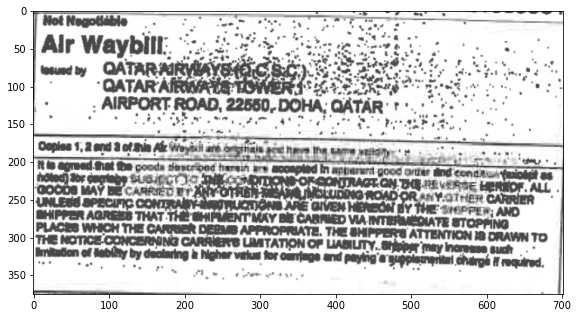

In [15]:
plotting(img)

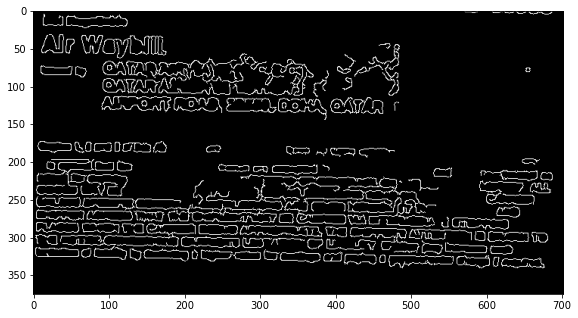

In [43]:
converted_image = np.array(img)
converted_image = cv2.cvtColor(converted_image, cv2.COLOR_RGB2BGR)
blur_image = cv2.GaussianBlur(converted_image, (11, 11), 0)
plotting(cv2.Canny(blur_image, 280, 100))


In [89]:
# Otsu's thresholding after Gaussian filtering
converted_image = np.array(img)
converted_image = cv2.cvtColor(converted_image, cv2.COLOR_RGB2BGR)
blur = cv2.GaussianBlur(converted_image, (5,5), 0)
ret3, th3 = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)


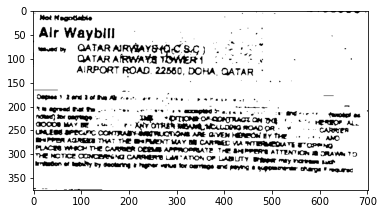

In [91]:
plt.imshow(th3)


In [49]:
def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(
        th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(
        blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3


In [50]:
def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(
        np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 41)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image


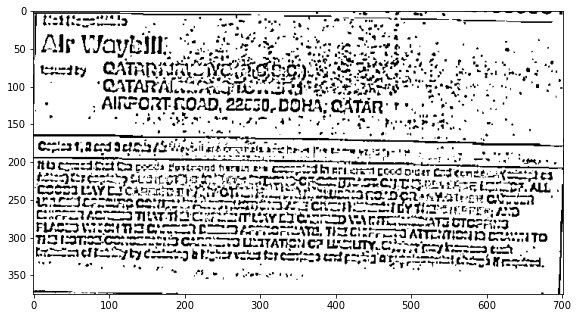

In [52]:
plotting(remove_noise_and_smooth('t2.png'))
